# point
-书上的代码最好贴上来或者自己手打一遍，看看效果如何，比如这里面的行索引、列索引，你不看一下根本不知道代码的区别在哪

-当前学习的最重要的点就是对数据进行清洗和处理，而不是最后一步可视化，第一次面试吸取的教训

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
df=pd.DataFrame(np.arange(9).reshape(3,3),index=('A','D','C'),columns=('Right','Left','Meidal'))

In [3]:
df

,Right,Left,Meidal
A,0,1,2
D,3,4,5
C,6,7,8


In [4]:
df.reindex(['A','C','D'])

,Right,Left,Meidal
A,0,1,2
C,6,7,8
D,3,4,5


In [5]:
df.reindex_axis

<bound method DataFrame.reindex_axis of    Right  Left  Meidal
A      0     1       2
D      3     4       5
C      6     7       8>

In [6]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
 index=['Ohio', 'Colorado', 'Utah', 'New York'],
 columns=['one', 'two', 'three', 'four'])

In [7]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [8]:
data[['two']]

,two
Ohio,1
Colorado,5
Utah,9
New York,13


In [9]:
data[['one','two']]#列索引

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


In [10]:
data[2:]#行索引

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [11]:
data[data['two']>4]#行索引

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


loc：按照轴标签进行选择
iloc：按照整数标签进行索引

In [12]:
data.loc['New York',['one','two']]

one    12
two    13
Name: New York, dtype: int32

In [13]:
data.iloc[3,[0,1]]

one    12
two    13
Name: New York, dtype: int32

补全缺失值

In [14]:
from numpy import nan as NA

In [15]:
 data = pd.DataFrame([[1., 6.5, 3.], [2., NA, NA],
 [NA, NA, NA], [NA, 8.5, 6.5]])

In [16]:
data

,0,1,2
0,1.0,6.5,3.0
1,2.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,8.5,6.5


In [17]:
data.fillna(data.mean())#这是对每一列求均值

,0,1,2
0,1.0,6.5,3.00
1,2.0,7.5,4.75
2,1.5,7.5,4.75
3,1.5,8.5,6.50


分层索引

In [18]:
data=pd.Series(np.random.randn(9),index=[['a','a','a','b','b','b','c','c','c'],[0,1,2,1,2,3,2,1,3]])

In [19]:
data

a  0    0.021365
   1   -1.388809
   2   -1.054439
b  1   -0.197067
   2   -0.178398
   3    0.224089
c  2   -1.476141
   1    0.539934
   3   -0.837521
dtype: float64

In [20]:
data.index

MultiIndex(levels=[['a', 'b', 'c'], [0, 1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 1, 2, 3, 2, 1, 3]])

In [21]:
data[1:3]

a  1   -1.388809
   2   -1.054439
dtype: float64

In [22]:
data.unstack()

,0,1,2,3
a,0.021365,-1.388809,-1.054439,NaN
b,NaN,-0.197067,-0.178398,0.224089
c,NaN,0.539934,-1.476141,-0.837521


In [23]:
data.unstack().stack()

a  0    0.021365
   1   -1.388809
   2   -1.054439
b  1   -0.197067
   2   -0.178398
   3    0.224089
c  1    0.539934
   2   -1.476141
   3   -0.837521
dtype: float64

在DataFrame中，每个轴都可以拥有分层索引

In [24]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
     columns=[['Ohio', 'Ohio', 'Colorado'],
     ['Green', 'Red', 'Green']])

In [25]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

matplotlib

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data=np.arange(10)

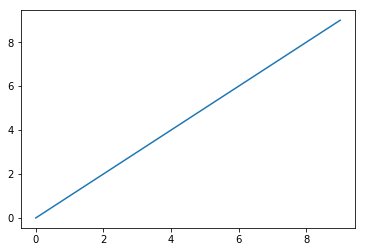

In [28]:
plt.plot(data)

In [29]:
data=np.random.randn(50).cumsum()

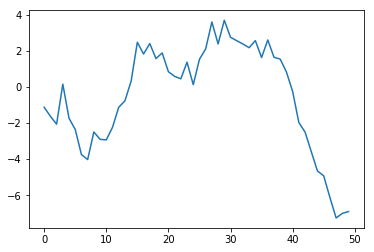

In [30]:
plt.plot(data)

alpha表示透明度 

stack表示堆叠

In [31]:
x=np.linspace(0,10,11)
y=x**2

In [32]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [33]:
y

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

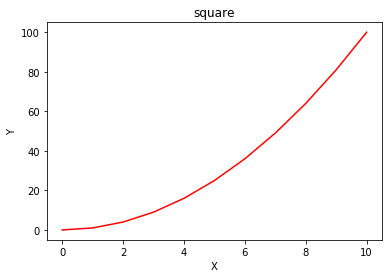

In [34]:
plt.title('square')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,y,'r')

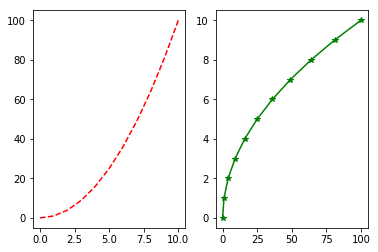

In [35]:
#绘制多图
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

In [36]:
figure=plt.figure()

<Figure size 432x288 with 0 Axes>

In [37]:
axes1=figure.add_axes([0,0,1,1])#left,buttom,width,height
axes2 = figure.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

In [38]:
# Larger Figure Axes 1
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')
axes1.plot(x, x**2, 'b')

In [39]:
# Insert Figure Axes 2
axes2.plot(x**3, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

In [40]:
plt.show()

In [41]:
import seaborn as sns
%matplotlib inline

In [42]:
tips = sns.load_dataset('tips')

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


B:\software\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


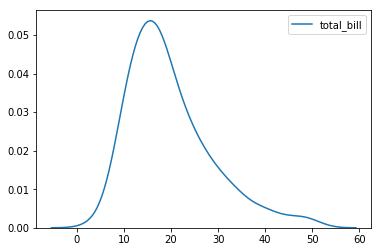

In [44]:
sns.kdeplot(tips['total_bill'])#选择某一列做核密度函数图

In [45]:
#数据清洗与准备
from numpy import nan as NA
series=pd.Series([1,NA,3,NA,5])

In [46]:
series

0    1.0
1    NaN
2    3.0
3    NaN
4    5.0
dtype: float64

In [47]:
series.dropna()

0    1.0
2    3.0
4    5.0
dtype: float64

In [48]:
series[series.notna()]

0    1.0
2    3.0
4    5.0
dtype: float64

In [49]:
series.notna()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [50]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])

In [52]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [51]:
data.dropna()#数据框用dropna会删除所有有NA的行

,0,1,2
0,1.0,6.5,3.0


In [54]:
data.dropna(how="all")#只删除均为NA的行

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [55]:
data[3]=NA

In [56]:
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [57]:
data.dropna(axis=1)#删除含有NA的列

""
0
1
2
3


In [60]:
data.iloc[:2,0]=NA#数值选择函数：iloc

In [61]:
data

,0,1,2,3
0,NaN,6.5,3.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [64]:
data.iloc[0,:3]=NA

In [65]:
data

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [66]:
data.duplicated()#第一行是第一次计算，故不重复

0    False
1     True
2     True
3    False
dtype: bool

In [67]:
data.drop_duplicates()

,0,1,2,3
0,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [68]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
     'Pastrami', 'corned beef', 'Bacon',
     'pastrami', 'honey ham', 'nova lox'],
     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [69]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [70]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

In [73]:
data['animal']=data['food'].str.lower().map(meat_to_animal)#创建新的一列作为映射

In [74]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [75]:
data.replace(3.0,-3.0)#改变单个值

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,-3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,-3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [77]:
data.replace(-3.0,3.0)

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [78]:
data.replace([3.0,4.0],[-3.0,-4.0])#替换多个值

,food,ounces,animal
0,bacon,-4.0,pig
1,pulled pork,-3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,-3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [79]:
data.replace([-3.0,-4.0],[3.0,4.0])

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [80]:
#分组查询
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [81]:
bins = [18, 25, 35, 60, 100]

In [82]:
cats = pd.cut(ages, bins)

In [83]:
cats#pandas返回的对象是一个特殊的Categorical对象。

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [84]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [85]:
data=np.random.randn(1000)

In [86]:
cats=pd.qcut(data,5)

In [87]:
cats

[(-0.828, -0.183], (-0.183, 0.334], (0.862, 2.547], (0.862, 2.547], (-2.995, -0.828], ..., (-2.995, -0.828], (0.334, 0.862], (-0.183, 0.334], (-0.828, -0.183], (-0.828, -0.183]]
Length: 1000
Categories (5, interval[float64]): [(-2.995, -0.828] < (-0.828, -0.183] < (-0.183, 0.334] < (0.334, 0.862] < (0.862, 2.547]]

In [88]:
pd.value_counts(cats)

(0.862, 2.547]      200
(0.334, 0.862]      200
(-0.183, 0.334]     200
(-0.828, -0.183]    200
(-2.995, -0.828]    200
dtype: int64

In [89]:
data=np.sign(data)

In [90]:
data

array([-1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,
        1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,
       -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
        1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,
        1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1

In [91]:
np.abs(data)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

inplace参数的理解：
         修改一个对象时：
               inplace=True：不创建新的对象，直接对原始对象进行修改；
               inplace=False：对数据进行修改，创建并返回新的对象承载其修改结果。
实例运行情况如图：
![](https://img-bbs.csdn.net/upload/201801/22/1516615197_720872.png)

In [96]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
 'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [104]:
dummies=pd.get_dummies(df['key'])
dummies

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [105]:
df_with_dummy=df[['data1']].join(dummies)
df_with_dummy

,data1,a,b,c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [110]:
#str处理
val = 'a,b, guido'
val

'a,b, guido'

In [108]:
val.split(",")

['a', 'b', ' guido']

In [112]:
#Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。
#注意：该方法只能删除开头或是结尾的字符，不能删除中间部分的字符。
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [113]:
#分层索引
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
        'c': ['one', 'one', 'one', 'two', 'two',
         'two', 'two'],
         'd': [0, 1, 2, 0, 1, 2, 3]})

In [114]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [115]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [116]:
#关联查询
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
     'data1': range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [118]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
     'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [122]:
merge_df=pd.merge(df1,df2,on='key')#on=表示关联的外键
merge_df#data1中的3对应的c不见了

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [123]:
#两张表的外键列名不同
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
     'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
     'data2': range(3)})

In [127]:
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [126]:
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [125]:
pd.merge(df3,df4,left_on='lkey',right_on='rkey')#默认是内连接，内连接求的是交集

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [128]:
pd.merge(df3,df4,left_on='lkey',right_on='rkey',how='outer')#外连接需要加how='outer'，外连接求的是并集

,lkey,data1,rkey,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
6,c,3.0,NaN,NaN
7,NaN,NaN,d,2.0


In [130]:
#按多个外键合并
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
     'key2': ['one', 'two', 'one'],
     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
     'key2': ['one', 'one', 'one', 'two'],
     'rval': [4, 5, 6, 7]})

In [131]:
left

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [132]:
right

,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [133]:
pd.merge(left,right,on=['key1','key2'],how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [134]:
#拼接
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [135]:
s1

a    0
b    1
dtype: int64

In [136]:
s2

c    2
d    3
e    4
dtype: int64

In [137]:
s3

f    5
g    6
dtype: int64

In [138]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [139]:
pd.concat([s1,s2,s3],axis=1)

B:\software\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [140]:
#分组与聚合操作
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
     'key2' : ['one', 'two', 'one', 'two', 'one'],
     'data1' : np.random.randn(5),
     'data2' : np.random.randn(5)})

In [141]:
df

,key1,key2,data1,data2
0,a,one,0.407555,-1.322067
1,a,two,1.067563,-0.741108
2,b,one,-0.314025,-0.757640
3,b,two,1.380581,-0.308177
4,a,one,-0.909093,-0.114403


In [144]:
grouped=df['data1'].groupby(df['key1'])
grouped#这是一个GroupBy对象

In [145]:
grouped.mean()

key1
a    0.188675
b    0.533278
Name: data1, dtype: float64

In [147]:
grouped.max()

key1
a    1.067563
b    1.380581
Name: data1, dtype: float64

In [148]:
df['data1'].groupby([df['key1'],df['key2']]).mean()#多分组查询

key1  key2
a     one    -0.250769
      two     1.067563
b     one    -0.314025
      two     1.380581
Name: data1, dtype: float64